# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
import datetime


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
!pip install citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625
['barentsburg', 'lebu', 'nizhneyansk', 'pevek', 'saint-philippe', 'busselton', 'mackenzie', 'bluff', 'revelstoke', 'kiama', 'mataura', 'kavieng', 'dovolnoye', 'minbu', 'amderma', 'chebsara', 'hilo', 'bathsheba', 'ushuaia', 'dikson', 'adrar', 'mata', 'tual', 'makakilo city', 'culiacan', 'cidreira', 'port alfred', 'waldorf', 'sirsa', 'podujevo', 'mazagao', 'east london', 'castro', 'macherla', 'yellowknife', 'maua', 'skalistyy', 'cape town', 'tuktoyaktuk', 'atuona', 'bambous virieux', 'tiksi', 'beringovskiy', 'margate', 'roald', 'bonavista', 'hermanus', 'lundazi', 'samarai', 'illoqqortoormiut', 'mar del plata', 'bredasdorp', 'hobart', 'butaritari', 'george town', 'jamestown', 'sanmenxia', 'qaqortoq', 'port elizabeth', 'opuwo', 'punta arenas', 'codrington', 'yenagoa', 'warqla', 'hasaki', 'eatonton', 'alice springs', 'ikalamavony', 'nikolskoye', 'kamina', 'indianapolis', 'salmas', 'santa fe', 'kazanovka', 'tura', 'qarqin', 'srednekolymsk', 'mount vernon', '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url ='https://api.openweathermap.org/data/2.5/weather?q='
# url_params ='https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
       

    # Create endpoint URL with each city
    city_url = f'{url}{city}&units=metric&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))


    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#         city_weather_params = requests.get(url_params, params={'appid':weather_api_key,'units':'metric','q':city}).json()
   

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | mackenzie
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | revelstoke
Processing Record 10 of Set 1 | kiama
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | dovolnoye
Processing Record 14 of Set 1 | minbu
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | chebsara
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | adrar
Processing Reco

Processing Record 38 of Set 4 | calamar
Processing Record 39 of Set 4 | kortkeros
Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | chunskiy
Processing Record 42 of Set 4 | marawi
Processing Record 43 of Set 4 | dunedin
Processing Record 44 of Set 4 | provideniya
Processing Record 45 of Set 4 | portland
Processing Record 46 of Set 4 | bosaso
Processing Record 47 of Set 4 | perelyub
Processing Record 48 of Set 4 | lolua
City not found. Skipping...
Processing Record 49 of Set 4 | aklavik
Processing Record 0 of Set 5 | yar-sale
Processing Record 1 of Set 5 | gamba
Processing Record 2 of Set 5 | cuenca
Processing Record 3 of Set 5 | davila
Processing Record 4 of Set 5 | saleaula
City not found. Skipping...
Processing Record 5 of Set 5 | zhicheng
Processing Record 6 of Set 5 | klaksvik
Processing Record 7 of Set 5 | bilma
Processing Record 8 of Set 5 | kupang
Processing Record 9 of Set 5 | port hardy
Processing Record 10 of Set 5 | flinders
Processing Record 11 of 

Processing Record 24 of Set 8 | kurilsk
Processing Record 25 of Set 8 | longyearbyen
Processing Record 26 of Set 8 | namatanai
Processing Record 27 of Set 8 | baykit
Processing Record 28 of Set 8 | borujerd
Processing Record 29 of Set 8 | salinopolis
Processing Record 30 of Set 8 | kushmurun
Processing Record 31 of Set 8 | batagay
Processing Record 32 of Set 8 | honiara
Processing Record 33 of Set 8 | henties bay
Processing Record 34 of Set 8 | puerto colombia
Processing Record 35 of Set 8 | awjilah
Processing Record 36 of Set 8 | taldan
Processing Record 37 of Set 8 | salalah
Processing Record 38 of Set 8 | kalmar
Processing Record 39 of Set 8 | los llanos de aridane
Processing Record 40 of Set 8 | merauke
Processing Record 41 of Set 8 | leshukonskoye
Processing Record 42 of Set 8 | soe
Processing Record 43 of Set 8 | sakakah
Processing Record 44 of Set 8 | oranjemund
Processing Record 45 of Set 8 | moose factory
Processing Record 46 of Set 8 | sitka
Processing Record 47 of Set 8 | se

Processing Record 14 of Set 12 | hwange
Processing Record 15 of Set 12 | sinjar
Processing Record 16 of Set 12 | evensk
Processing Record 17 of Set 12 | svetlogorsk
Processing Record 18 of Set 12 | ilhabela
Processing Record 19 of Set 12 | easley
Processing Record 20 of Set 12 | zirandaro
Processing Record 21 of Set 12 | sexsmith
Processing Record 22 of Set 12 | saint-louis
Processing Record 23 of Set 12 | cedar city
Processing Record 24 of Set 12 | toliary
City not found. Skipping...
Processing Record 25 of Set 12 | conway
Processing Record 26 of Set 12 | santo antonio do ica
Processing Record 27 of Set 12 | atar
Processing Record 28 of Set 12 | tyler
Processing Record 29 of Set 12 | teguise
Processing Record 30 of Set 12 | berlevag
Processing Record 31 of Set 12 | diebougou
Processing Record 32 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 33 of Set 12 | verkhnevilyuysk
Processing Record 34 of Set 12 | dzhebariki-khaya
Processing Record 35 of Set 12 | san quin

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,15.75,54,0,7.55,CL,1669911316
1,pevek,69.7008,170.3133,-1.59,76,81,11.47,RU,1669911317
2,saint-philippe,-21.3585,55.7679,25.77,78,53,2.50,RE,1669911319
3,busselton,-33.6500,115.3333,12.21,92,0,3.91,AU,1669911320
4,mackenzie,55.2999,-123.1698,-29.73,98,12,0.50,CA,1669911321


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,15.75,54,0,7.55,CL,1669911316
1,pevek,69.7008,170.3133,-1.59,76,81,11.47,RU,1669911317
2,saint-philippe,-21.3585,55.7679,25.77,78,53,2.50,RE,1669911319
3,busselton,-33.6500,115.3333,12.21,92,0,3.91,AU,1669911320
4,mackenzie,55.2999,-123.1698,-29.73,98,12,0.50,CA,1669911321


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

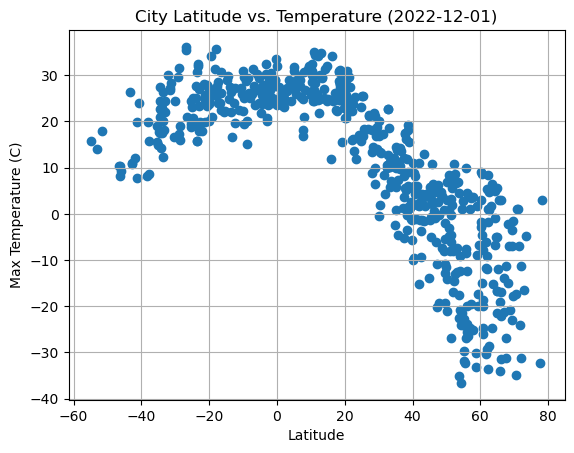

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Temperature (2022-12-01)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

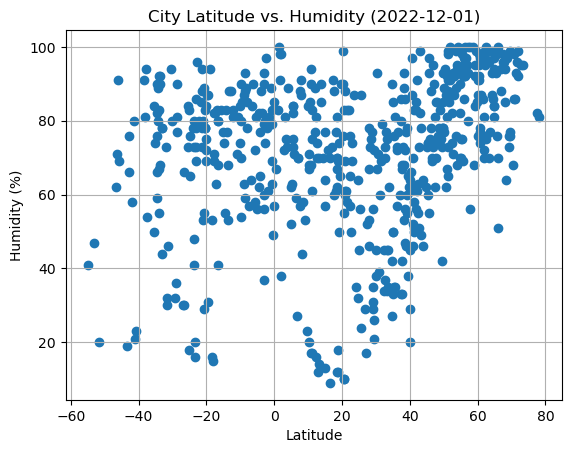

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (2022-12-01)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

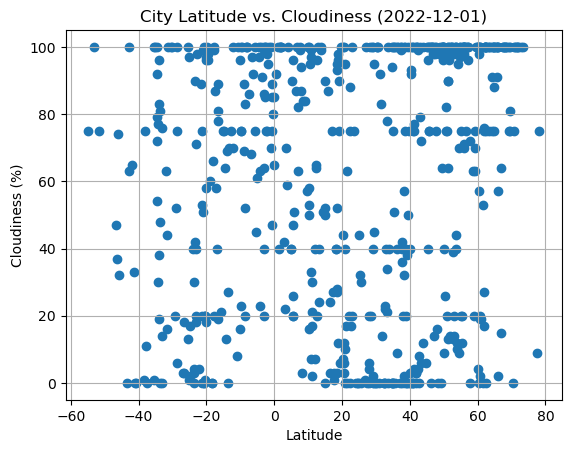

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (2022-12-01)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

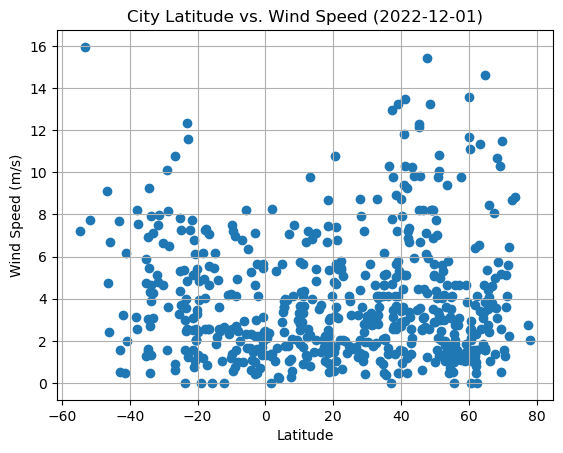

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed (2022-12-01)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [136]:
# Define a function to create Linear Regression plots
def lin_reg(x,y,label1,label2):
    y_slope, y_int, y_r, y_p, y_std_err = linregress(x,y)
    y_fit = y_slope * x + y_int
    plt.scatter(x,y)
    plt.plot(x,y_fit,"r")
    plt.xlabel(str(label1))
    plt.ylabel(str(label2))
    print(f'The r-value is:{y_r}')
    print(f'With a p-value of: {round(y_p,5)}')
    plt.show()
    

In [137]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pevek,69.7008,170.3133,-1.59,76,81,11.47,RU,1669911317
4,mackenzie,55.2999,-123.1698,-29.73,98,12,0.50,CA,1669911321
6,revelstoke,50.9832,-118.2023,-7.99,67,75,9.77,CA,1669911323
10,dovolnoye,54.4958,79.6671,-21.55,93,9,3.12,RU,1669911327
11,minbu,20.1833,94.8833,23.90,76,7,1.49,MM,1669911327


In [138]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,15.75,54,0,7.55,CL,1669911316
2,saint-philippe,-21.3585,55.7679,25.77,78,53,2.50,RE,1669911319
3,busselton,-33.6500,115.3333,12.21,92,0,3.91,AU,1669911320
5,bluff,-46.6000,168.3333,10.45,62,47,9.13,NZ,1669911040
7,kiama,-34.6833,150.8667,17.78,82,79,1.61,AU,1669911324


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.846293541271796
With a p-value of: 0.0


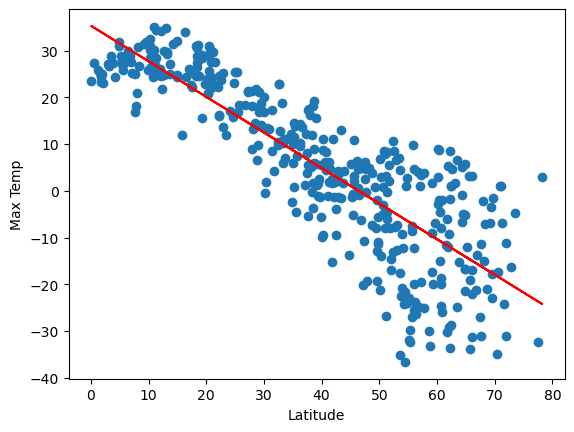

In [139]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp")


The r-value is:0.563389811949361
With a p-value of: 0.0


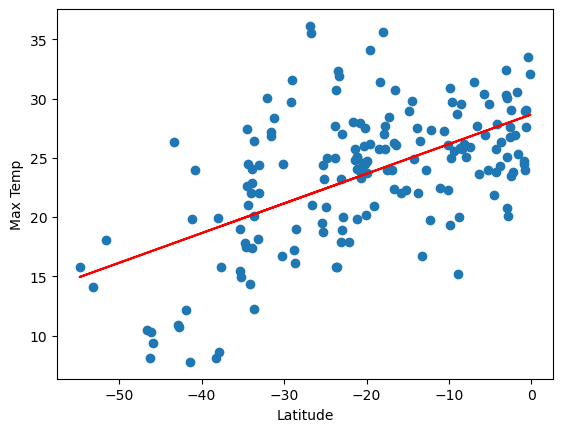

In [140]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],"Latitude","Max Temp")

**Discussion about the linear relationship:** Regarding botht hemispheres the more you approche the equator (0) the the greater the average temperature. Therefore in the the northern hemisphere the regression lines slope is negative while in the southern hemisphere the regresson's slope is positive. From this graph you can also tell that it is currently winter in the norther hemisphere due to the high slope of the northern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.42150143282876873
With a p-value of: 0.0


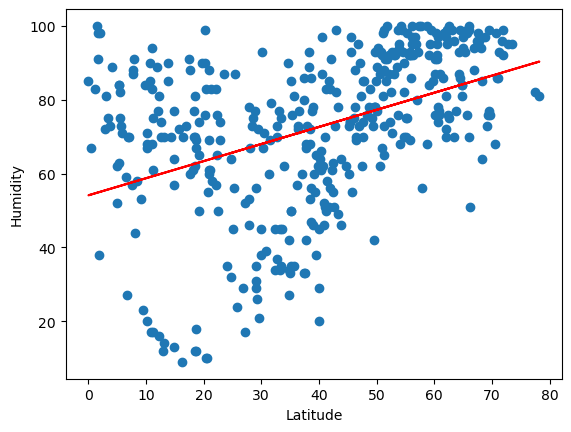

In [141]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity")

The r-value is:0.2228065576894721
With a p-value of: 0.0034


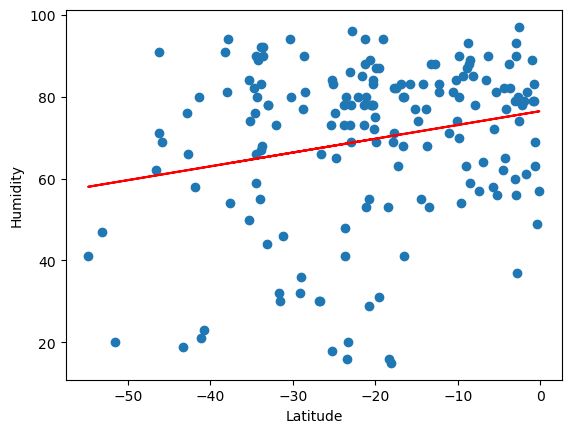

In [142]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],"Latitude","Humidity")

**Discussion about the linear relationship:** The regression lines for both the northern and southern hemisphere had a correlation when increasing in latitue. The correlation's r-value for the southern hemisphere was 0.22 meaning that the effectsize was small. Meanwhile, the Northern hemispheres r-value was 0.41.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.21897172800663747
With a p-value of: 1e-05


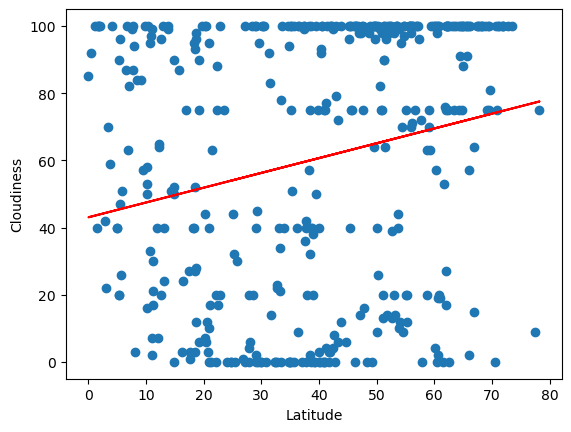

In [143]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness")

The r-value is:0.27072152469778277
With a p-value of: 0.00034


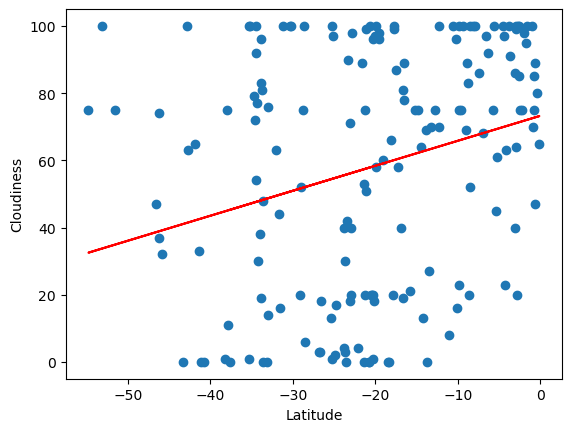

In [144]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],"Latitude","Cloudiness")

**Discussion about the linear relationship:** The regression lines for both the northern and southern hemisphere had a correlation when increasing in latitue. Both the northern and southern hemisphere's regression lines' r-value were less then 0.3 and can therefore be considered to have a small effect.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.10969933579162969
With a p-value of: 0.02747


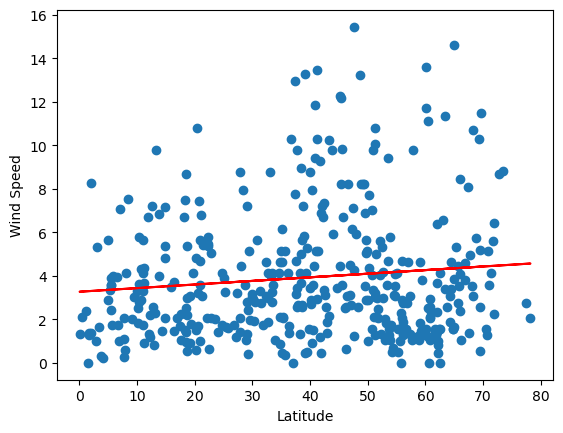

In [145]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed")

The r-value is:-0.31998898763366673
With a p-value of: 2e-05


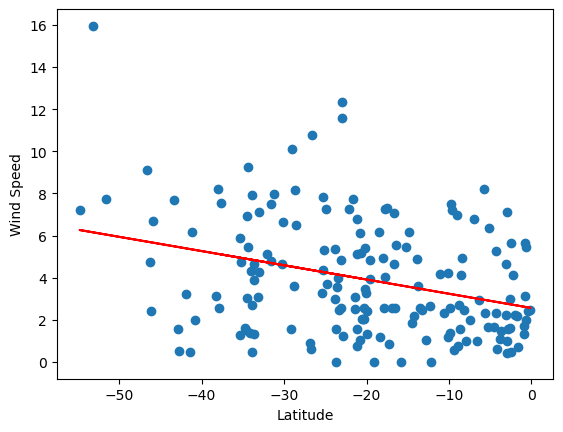

In [146]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],"Latitude","Wind Speed")

**Discussion about the linear relationship:** The regression lines of wind trended upwards the further away from the equator(0) the city was.